### Decision Tree in Machine Learning

A decision tree is a supervised learning algorithm used for both classification and regression tasks.

It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes.

It works like a flowchart help to make decisions step by step where:

`Internal nodes` represent attribute tests
`Branches` represent attribute values
`Leaf nodes` represent final decisions or predictions.

#### How Does a Decision Tree Work?

A decision tree splits the dataset based on feature values to create pure subsets ideally all items in a group belong to the same class.

Each leaf node of the tree corresponds to a class label and the internal nodes are feature-based decision points

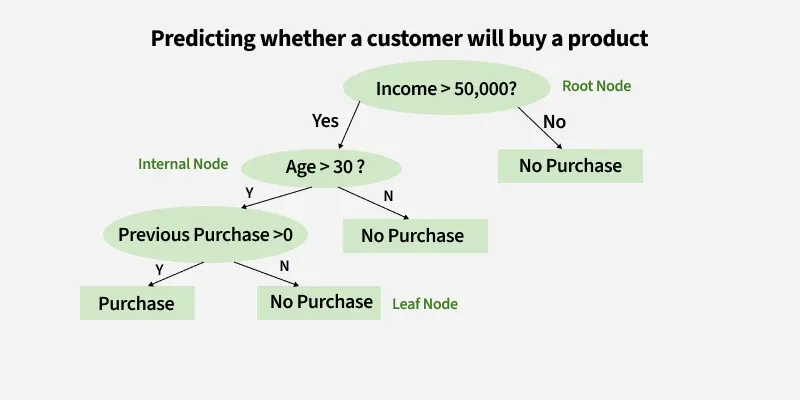

Let’s consider a decision tree for predicting whether a customer will buy a product based on age, income and previous purchases: Here's how the decision tree works:

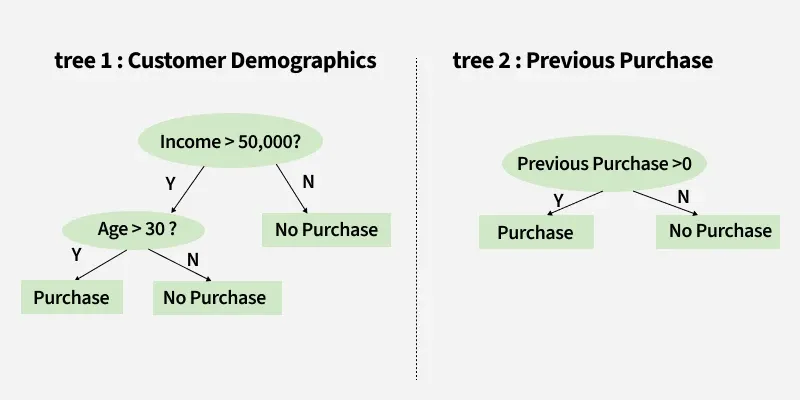

Example: Predicting Whether a Customer Will Buy a Product Using Two Decision Trees

Once we have predictions from both trees, we can combine the results to make a final prediction. 

If Tree 1 predicts "Purchase" and Tree 2 predicts "No Purchase", the final prediction might be "Purchase" or "No Purchase" depending on the weight or confidence assigned to each tree. 



### Information Gain and Gini Index in Decision Tree

lets now move to the attribute selection measure of decision tree. 

We have two popular attribute selection measures used:

#### 1. Information Gain

Information Gain tells us how useful a question (or feature) is for splitting data into groups.

It measures how much the uncertainty decreases after the split.

A good question will create clearer groups and the feature with the highest Information Gain is chosen to make the decision.

`For example` if we split a dataset of people into "Young" and "Old" based on age and all young people bought the product while all old people did not, the Information Gain would be high because the split perfectly separates the two groups with no uncertainty left

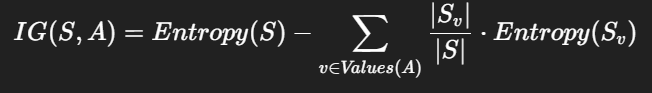 where:

- S → The set of training examples.
- A → The attribute (feature) on which we split.
- Values(A) → All possible values of attribute 
- ∣𝑆𝑣∣ → subset of S,v represents an individual value that the attribute A can take
- ∣S∣ → Total number of samples in the dataset.
- Entropy(S) → The impurity of the dataset before the split.
- Entropy(S_v) → The impurity of the subset after the split.

`Entropy`: is the measure of uncertainty of a random variable it characterizes the impurity of an arbitrary collection of examples. The higher the entropy more the information content.

For example if a dataset has an equal number of "Yes" and "No" outcomes (like 3 people who bought a product and 3 who didn’t), the entropy is high because it’s uncertain which outcome to predict. But if all the outcomes are the same (all "Yes" or all "No") the entropy is 0 meaning there is no uncertainty left in predicting the outcome

#### Building Decision Tree using Information Gain the essentials

- Start with all training instances associated with the root node
- Use info gain to choose which attribute to label each node with
- Recursively construct each subtree on the subset of training instances that would be classified down that path in the tree.
- If all positive or all negative training instances remain, then label that node “yes" or “no" accordingly
- If no attributes remain label with a majority vote of training instances left at that node
- If no instances remain label with a majority vote of the parent's training instances.

#### 2. Gini Index

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.

It means an attribute with a lower Gini index should be preferred.

`For example` if we have a group of people where all bought the product (100% "Yes") the Gini Index is 0 indicate perfect purity.

But if the group has an equal mix of "Yes" and "No" the Gini Index would be 0.5 show high impurity or uncertainty. Formula for Gini Index is given by :

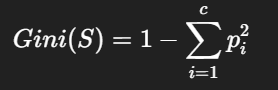

- S → The dataset (or subset after a split).
- c → Number of classes.
- 𝑝𝑖 → Proportion (probability) of samples belonging to class i in dataset S.



#### additional features of the Gini Index are:

- In decision trees the Gini Index is used to evaluate the quality of a split by measuring the difference between the impurity of the parent node and the weighted impurity of the child nodes.

- Compared to other impurity measures like entropy, the Gini Index is faster to compute and more sensitive to changes in class probabilities.

- In practice the choice between using the Gini Index or other impurity measures depends on the specific problem and dataset and requires experimentation and tuning.

#### Random Forest Algorithm in Machine Learning

Random Forest is a machine learning algorithm that uses many decision trees to make better predictions.

Each tree looks at different random parts of the data and their results are combined by `voting` for classification or `averaging` for regression. 

This helps in improving accuracy and reducing errors.

#### Working of Random Forest Algorithm

- `Create Many Decision Trees:` The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.
- `Pick Random Features:` When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
- `Each Tree Makes a Prediction:` Every tree gives its own answer or prediction based on what it learned from its part of the data.
- `Combine the Predictions:`
    - For `classification` we choose a category as the final answer is the one that most trees agree on i.e majority voting.
    - For `regression` we predict a number as the final answer is the average of all the trees predictions.

#### Implementing Random Forest for Classification Tasks
Here we will predict survival rate of a person in titanic.

- Import libraries and load the Titanic dataset.
- Remove rows with missing target values ('Survived').
- Select features like class, sex, age, etc and convert 'Sex' to numbers.
- Fill missing age values with the median.
- Split the data into training and testing sets, then train a Random Forest model.
- Predict on test data, check accuracy and print a sample prediction result.

#### Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [26]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Check missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Preprocessing

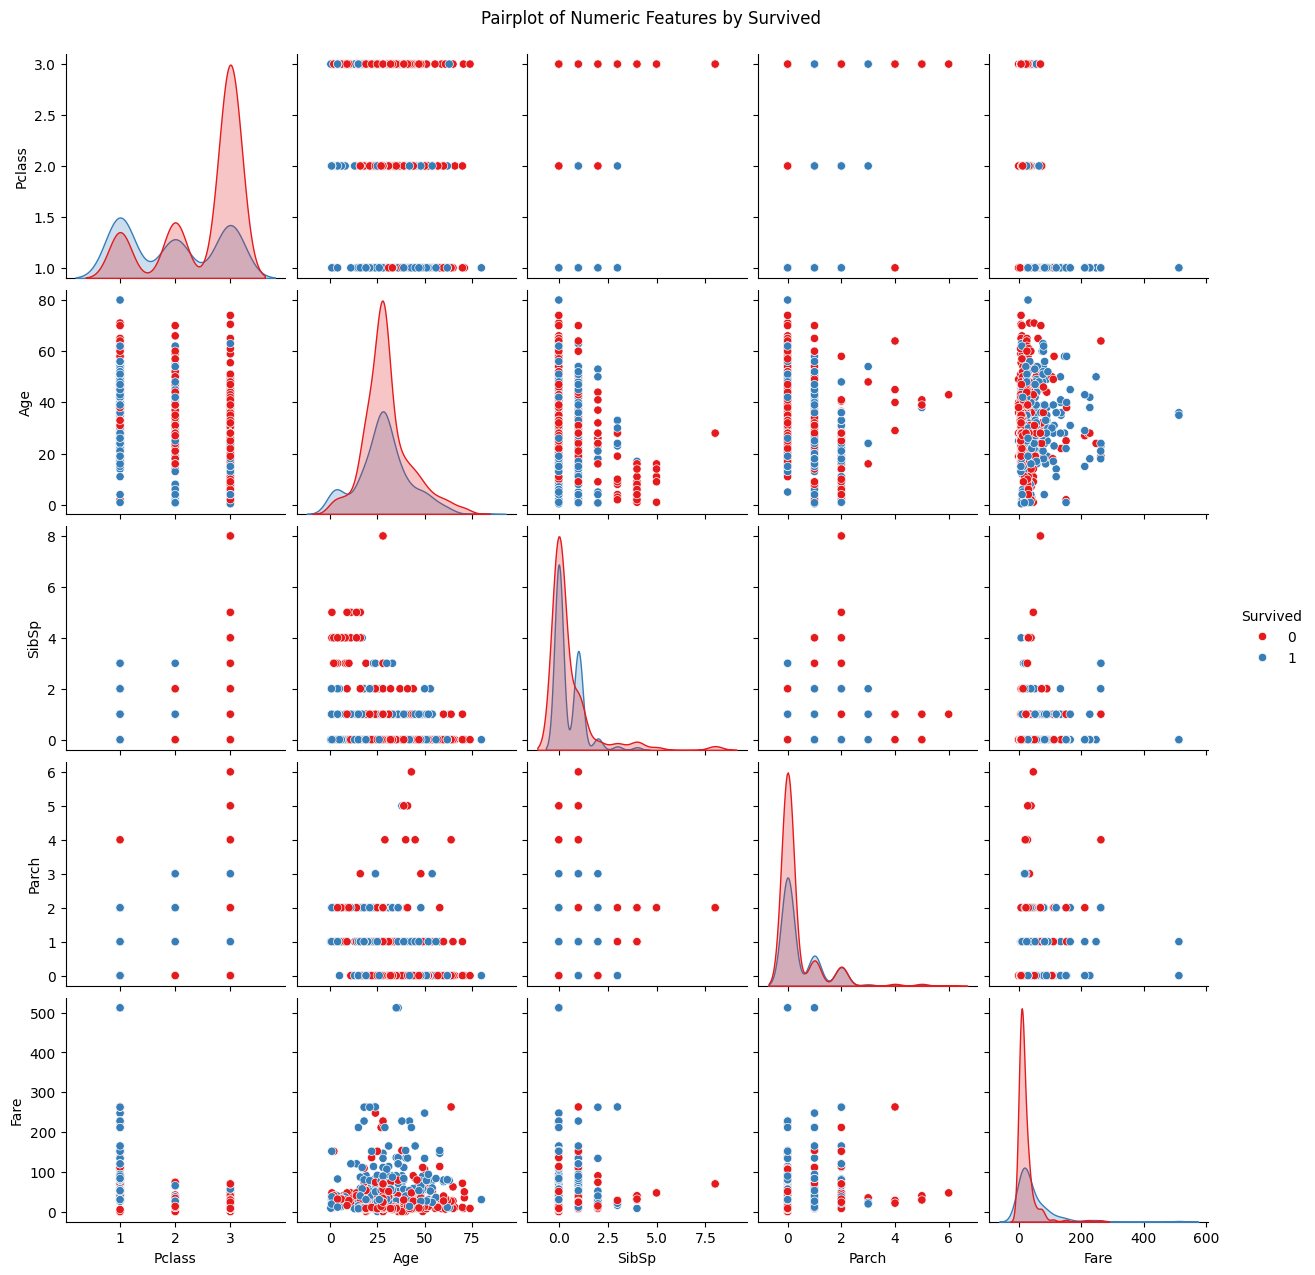

In [67]:
# Select numeric features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Fill missing values for Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Create pairplot
sns.pairplot(df[numeric_features], hue='Survived', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Numeric Features by Survived", y=1.02)
plt.show()


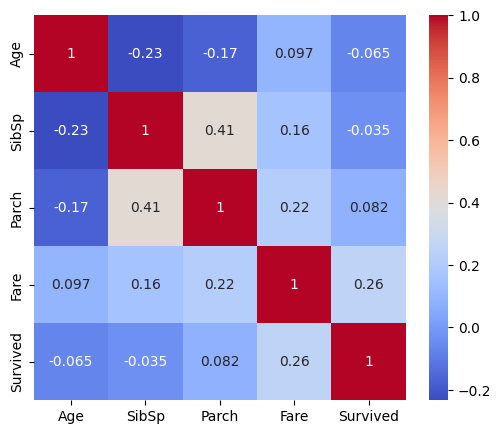

In [65]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_features + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.show()

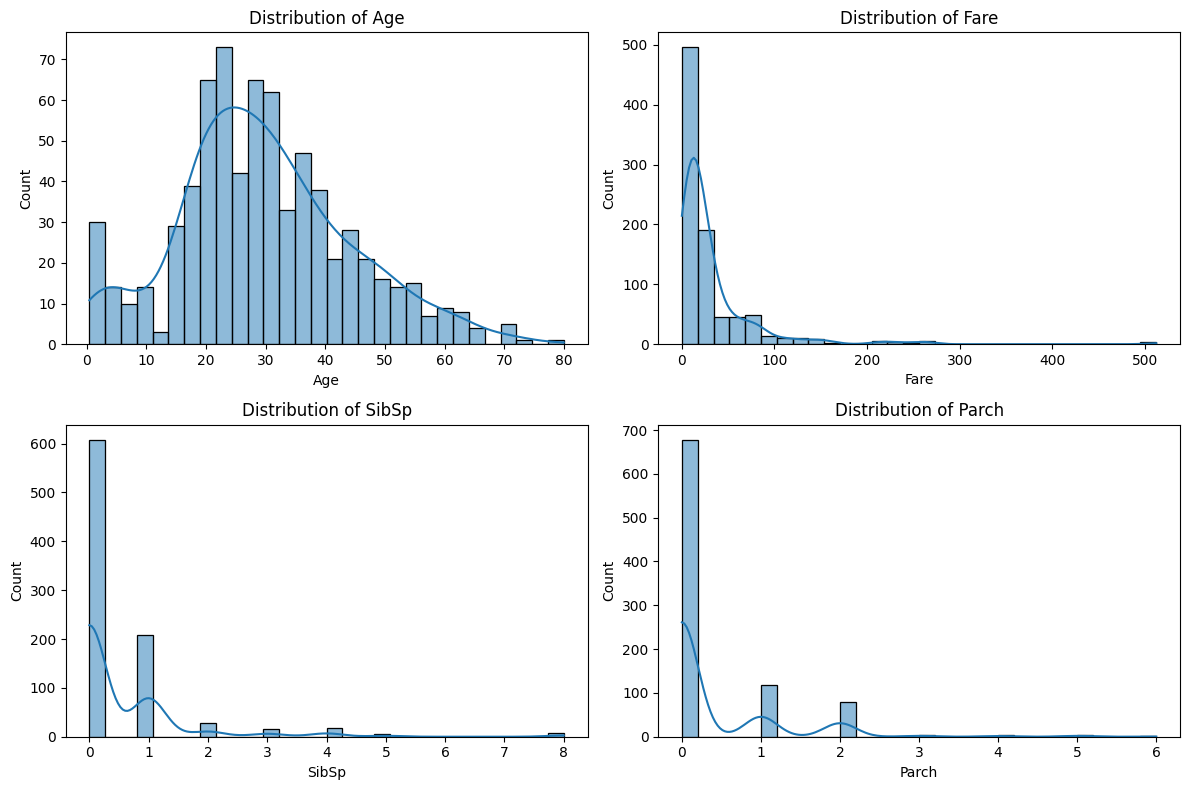

In [11]:
# Select only the numerical columns of interest
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Handle missing values

In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [29]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [30]:
df.drop('Cabin', axis=1, inplace=True)

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

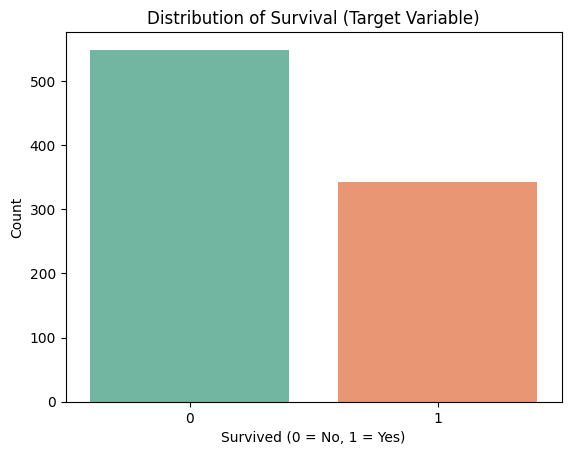

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [13]:
# Countplot for target variable
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Distribution of Survival (Target Variable)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Also check percentages
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

#### Encoding Categorical Variables

In [32]:
# Encode Sex (binary)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

In [33]:
# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

In [34]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


#### Define Features and Target

In [49]:
# Features (X) and Target (y)
X = df.drop('Survived', axis=1)  # all predictors
y = df['Survived']               # target variable

#### Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Create Pipelines and Model Parameters

In [ ]:
# Logistic Regression with RobustScaler
pipe_lr = make_pipeline(
    RobustScaler(),
    LogisticRegression(random_state=42)
)

# Decision Tree 
pipe_dt = make_pipeline(
    RobustScaler(),
    DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
)

# Random Forest
pipe_rf = make_pipeline(
    RobustScaler(),
    RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=7, random_state=42)
)


#### Train the Models

In [56]:
pipe_lr.fit(X_train, y_train)

,steps,"[('robustscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,penalty,'l2'
,dual,False


In [57]:
pipe_dt.fit(X_train, y_train)

,steps,"[('robustscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,criterion,'gini'
,splitter,'best'


In [58]:
pipe_rf.fit(X_train, y_train)

,steps,"[('robustscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,n_estimators,100
,criterion,'entropy'


#### Evaluate Models on Train and Test Sets

In [59]:
models = {'Logistic Regression': pipe_lr, 
          'Decision Tree': pipe_dt, 
          'Random Forest': pipe_rf}

for name, model in models.items():
    print(f"\n{name} Evaluation")
    
    # Training performance
    y_train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    
    # Testing performance
    y_test_pred = model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))



Logistic Regression Evaluation
Train Accuracy: 0.8047752808988764
Test Accuracy: 0.8044692737430168
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix (Test):
 [[89 16]
 [19 55]]

Decision Tree Evaluation
Train Accuracy: 0.8595505617977528
Test Accuracy: 0.7932960893854749
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix (Test):
 [[92 13]
 [24 50]

#### The format of the matrix is:

|          | Predicted 0 | Predicted 1 |
| -------- | ----------- | ----------- |
| Actual 0 | TN          | FP          |
| Actual 1 | FN          | TP          |

Where:

- `TN (True Negative)` = correctly predicted negatives
- `FP (False Positive)` = actually negative but predicted positive
- `FN (False Negative)` = actually positive but predicted negative 
- `TP (True Positive)` = correctly predicted positives 

In [60]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


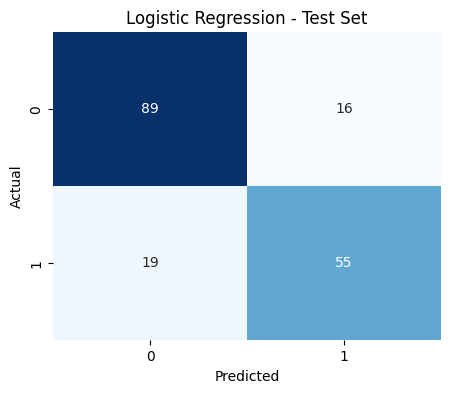

In [61]:
y_test_pred_lr = pipe_lr.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_lr, title='Logistic Regression - Test Set')

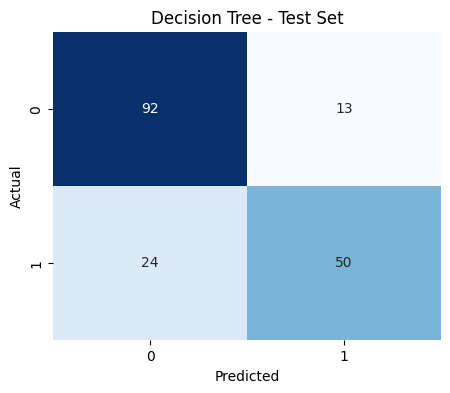

In [62]:
y_test_pred_dt = pipe_dt.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_dt, title='Decision Tree - Test Set')

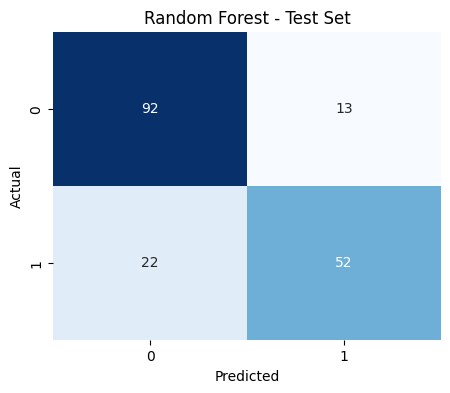

In [63]:
y_test_pred_rf = pipe_rf.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_rf, title='Random Forest - Test Set')